In [1]:
# Import functions
import numpy as np
import matplotlib.pyplot as p
% matplotlib inline

import eigencurves
import eigenmaps
import kmeans
#import mapPCA
import bin_eigenspectra

from importlib import import_module
planet_name = 'HD189733b'
system = import_module('data.planet.{}'.format(planet_name))

looking for spidermanrc file at /Users/arthur/.spidermanrc
no spidermanrc file detected


### Import spectra and generate map

In [2]:
# ...

### Generate lightcurve using STARRY

In [3]:
# ...

### Fit eigencurves to lightcurve

In [4]:
lcfile = 'data/output_lightcurves/practice1p01renorm'
spherearray = eigencurves.eigencurves(lcfile)
# spherearray is an array of wavelength x SH coefficents

/Users/arthur/Documents/GitHub/eigenspectra/eigencurves.py:148: ComplexWarning: Casting complex values to real discards the imaginary part
  spheres[i] += fcoeff.T[j,2*i-1]-fcoeff.T[j,2*(i-1)]


Do we need to output the full posteriors?

In [5]:
print(spherearray.shape)

(10, 10)


### Turn SH coefficients into maps

(example)

# Loop over 5. to get errors

In [22]:
ngroups = 2
samples = np.array([spherearray]) # output from eigencurves

eigenspectra_draws = []
kgroup_draws = []

wavelengths, lats, lons, maps = eigenmaps.generate_maps(samples, N_lon=100, N_lat=100)

for draw, map_ in zip(samples, maps):
    kgroups = kmeans.kmeans(map_, ngroups)
    
    eigenspectra = bin_eigenspectra.bin_eigenspectra(map_, kgroups)
    
    eigenspectra_draws.append(eigenspectra)
    kgroup_draws.append(kgroups)

In [24]:
eigenspectra = np.mean(eigenspectra_draws, axis=0)
eigenerrs = np.std(eigenspectra_draws, axis=0)

kgroups = np.mean(kgroup_draws, axis=0)

AssertionError: 

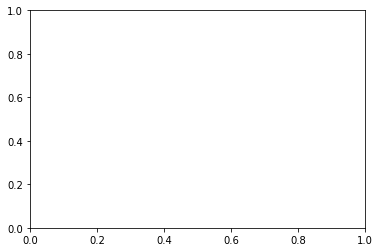

In [26]:
for spec, err in zip(eigenspectra, eigenerrs):
    p.errorbar(waves, spec, err)
p.xlabel('Wavelength (micron)')
p.ylabel('Fp/Fs (ppm)')
p.title('Eigenspectra from light-curve fit')
p.show()

In [ ]:
ax = p.imshow(kgroups)
cbar = p.colorbar(ax, ticks=np.arange(ngroups))
cbar.set_label('# Group')
p.xlabel('Latitude')
p.ylabel('Longitude')
p.title('Retrieved group map')
p.show()

# Tests

### Creat a fake data set

Fake data 1, two distinct spectra

In [ ]:
lamdim = 10
latdim = 6
londim = 4
ngroups = 3

# dummy flux values
waves = np.linspace(1,2,lamdim) # micron
spec1 = np.linspace(1000,2000,lamdim) # in ppm
spec2 = np.linspace(500,600,lamdim) # in ppm
spec2[lamdim//2:-1] *= 0.5

spectra1 = [[ spec1+np.random.normal(0,100,lamdim) for _ in range(latdim) ] for __ in range(londim//2)]
spectra2 = [[ spec2+np.random.normal(0,100,lamdim) for _ in range(latdim) ] for __ in range(londim//2)]
fp_grid = np.array(spectra1+spectra2).T
print(fp_grid.shape) # should be wave, lat, lon


for lat in range(latdim):
    for lon in range(londim):
        spec = fp_grid[:,lat,lon]
        err = 100 # ppm
        p.errorbar(waves, spec, err)
p.ylabel('Fp/Fs (ppm)')
p.xlabel('Wavelength (micron)')
p.show()

Fake data 2, smoothly varying spectra

In [ ]:
fp_grid2 = np.empty((lamdim,latdim,londim))
for lat in range(latdim):
    for lon in range(londim):
        f = np.random.uniform(0,1)**2
        err = np.random.normal(0,100,lamdim)
        fp_grid2[:, lat, lon] = f*spec1 + (1-f)*spec2 + err


for lat in range(latdim):
    for lon in range(londim):
        spec = fp_grid2[:,lat,lon]
        err = 100 # ppm
        p.errorbar(waves, spec, err)
p.ylabel('Fp/Fs (ppm)')
p.xlabel('Wavelength (micron)')
p.show()

### Get groups from K-means clustering

In [ ]:
kgroups = kmeans.kmeans(fp_grid, ngroups)

kgroups2 = kmeans.kmeans(fp_grid2, ngroups)

### Create eigenspectra from K-mean clustering output

In [ ]:
eigenspectra = bin_eigenspectra.bin_eigenspectra(fp_grid, kgroups)

eigenspectra2 = bin_eigenspectra.bin_eigenspectra(fp_grid2, kgroups2)

In [ ]:
for spec in eigenspectra:
    p.plot(waves, spec)
p.title('Distinct spectra (Test 1)')
ylim = p.ylim()
p.show()

for spec in eigenspectra2:
    p.plot(waves, spec)
p.title('Smooth spectra (Test 2)')
p.ylim(ylim)
p.show()